I will type result participation at the top of every block of code, and type the discussion part at the bottom of each set of problem. 
First, I import necessary package and mount my google drive in order to get access to the ORL faces folder. PIL package is used for preprocessing the ORL faces photos.



In [ ]:
import numpy as np
import pandas as pd
from PIL import Image
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Question 1-1:

First, the gender part was specificly marked by ourselves. As teacher said, as regression was a supervised learning model, we need to label the photos by yourself in this homework and see if a regression model works.

Then, we read each of the photos and transpose them into matrices. A 46*56 definition photo can turn into a matrices with 2576 values, each value represents the brightness of that point, since those photos are black-white photos.

Finally, we flatten each photos to make the 2D matrices one-dimension. Although this step might make the photos lost its directionality, but it will be easier to analyze and demostrate.

We have 400 photos, each photo have 2576 spots. So we have a 2D ndarray (400x2576) matrix. We will use it to make linear regression.



In [ ]:
gender = [0,1,1,1,1,1,1,0,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1]
data = []
for i in range(1, 41):
    for j in range(1,11):
        image_dir = f"/content/drive/MyDrive/ORL Faces/{i}_{j}.png"
        img = Image.open(image_dir)
        img_array = np.asarray(img)
        img_array = np.append(img_array, gender[i-1])
        data.append(img_array.flatten())
data = np.array(data)

Let's check the shape of this matrix!

In [ ]:
data[:,:-1].shape

(400, 2576)

Question 1-2:

We try to use linear regression to find the best parameters of the matrix to describe. We use the linear regression method. Data[:,:-1] means the brightness points of each picture, and data[:,-1] means the gender of each picture, which is output of each inputs.

Although the code give us seemingly nice one intercept and 2576 coefficient, we have to look into to result to chech whether the answer is valid or not.

From the perspective of linear algebra, we find that it is unable to calculate A^TA inverse, which means the answer of this matrix should be no solutions. From the perspective of high school math, we found that we use 2576 parameter(a0+a1x1+a2x2...+anxn), while the restrictive(限制式) are only 400. 

It implies that the answer of paramters will be infinitely many. Therefore, although we can see a set of intercept and coefficient to describe the matrix, it is of no use, since there are infinite solution to this problem.

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(data[:,:-1],data[:, -1])
print('intercept:',model.intercept_)
print('coefficient:',model.coef_)
print(max(model.coef_)) # 用公式解(ALG) ATA inverse算不出來 會有無限多組解 

intercept: 0.8096839954559842
coefficient: [ 8.39916784e-05  1.08459706e-04  1.07400070e-04 ... -4.26834929e-05
 -1.90141989e-04 -1.65655457e-04]
0.00037564741414733167


In [ ]:
pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Question 1-3:

perform the stepwise regression label from a null model to find the important pixels.

In any phenomenon, there will be certain factors that play a bigger role in determining an outcome. In simple terms, stepwise regression is a process that helps determine which factors are important and which are not. Certain variables have a rather high p-value and were not meaningfully contributing to the accuracy of our prediction. From there, only important factors are kept to ensure that the linear model does its prediction based on factors that can help it produce the most accurate result.(quote from Ryan Kwok's medium. reference: https://towardsdatascience.com/stepwise-regression-tutorial-in-python-ebf7c782c922)

Therefore, our work is to find some points that matter most to recognize a photo. The first three sentences are extra code to prevent the unepected errors. We majorly use SequentialFeatureSelector to find the most important pixels. 

In this model, we set max iterarions to be 1000, but the process will end before this number. K_features mean how many important pixels should the model choose, we set 10, since I found out that after 10 pixels, the score will remain on 99.5% and will not be lifted phenomenally. Forward=True means that we use a null model first, and we add the most important points to best describe the datas. If it was false, it will be the opposite: the model will conclude all of the pixels, and we try to delete the less important pixels. We use the former because of what problem demands.

In [ ]:
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn import linear_model

df = pd.DataFrame(data)
X = df.iloc[:, :-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

sfs = SequentialFeatureSelector(linear_model.LogisticRegression(max_iter=1000),
                                k_features=10,
                                forward=True,
                                scoring='accuracy',
                                verbose = 2,
                                cv=None)
sfs.fit(X_train, y_train)
feature = list(forward.k_feature_names_)
print(feature)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 2576 out of 2576 | elapsed:   18.2s finished

[2023-03-12 00:41:07] Features: 1/10 -- score: 0.9025[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 2575 out of 2575 | elapsed:   27.0s finished

[2023-03-12 00:41:34] Features: 2/10 -- score: 0.9475[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 2574 out of 2574 | elapsed:   29.7s finished

[2023-03-12 00:42:04] Features: 3/10 -- score: 0.9725[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.

[2, 99, 134, 318, 440, 446, 600, 1932, 2164, 2208]


[Parallel(n_jobs=1)]: Done 2567 out of 2567 | elapsed:  1.3min finished

[2023-03-12 00:47:47] Features: 10/10 -- score: 0.995

Lastly, we use matplotlib to visualize the problem. We first a 46x56 canva, than put the result pixelss on it. We can see where are the most important pixels. 

They are mainly on the upper-right part and middle-bottem part of the photos to determain whether the person in the photos is a man or a woman.

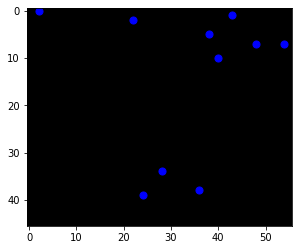

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(np.zeros((46, 56)), cmap="copper")
plt.scatter([num % 56 for num in feature],[num // 56 for num in feature], c="blue", s=50)
plt.show()

Discussion: 
1. I think that most of the discussions are demonstrated above, so this part might be a little simplier.
2. After seeing the scatterplot, I think the hair and the mouth&jaw will be the main part. The woman hair is more that the man, and at the upper-right part, the man may be no hair, but woman have, because their hair is more and fluffy. Secondly, the man's faces are longer than woman, and they have longer jaws. So, their jaws and mouths will be a bit lower than woman, causing the phenomenon of the output. these output is align to our expectation: some features matter more than other features, and it will form some significant groups.
3. In the sfs model, we use LogisticRegression model due to the problem discussed before. From the perspective of LA, we shouldn't use the linear regression, and the sfs model will refuse it, too. So, we use logistic regression and achieve the goal. 

Question 2:

design an iterative algorithm base on repeating "multiple regressions" ro achieve the highest point of the volcano. (the volcano is in New Zealand!) The starting point is at right bottom corner. Although the problem indicate (87,1), but from the perspective of pandas, it should be (86,60), since the beginning is 0, not 1, and the values of x2-axis coordination is increment.

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression

There are a lot of discussion of this part.

1. How to achieve the highest point of this volcano? I use the method that consider the two coefficient of each iterative turn as the optimization direction. Seeing the hint, we first set the domain size to be 2, which means the domain size is a 5x5 smaller matrix. (we use the existing point as the center of each matrix, and take the surrounding neighbor into account to take into consideration. Centered at the existing point, we extend by 2 of each direction, making it 5x5.)
2. sentence 14-18: Based on my observation and the code implies, the output of the coefficients will not be significant enough if the different values (elevations) in the smaller domain matrix are less than three. Therefore, if we found the elevations of that domain matrix are less than three type, we abandon using the linear regression method and just let the existing point move to the upper-left side.
3. sentence 30-31: since we use the coefficient to determine the direction, it is possible that the existing point stuck at specific pixels because both coefficients are 0 after we round it. Therefore, we should expand the scale of the domain size to take more pixels into consider, and it might be helpful to escape. It will become more and more large, until the domain reach the border the volcano.csv data.

4. sentence 19-26: However, although we largen the scale due to aforementioned reason, it is not good enough - what affect the existing point most should be its neighbor, but when we largen our scale, the effect of these point will be diluted. Therefore, when the domain size reach maximum, we turn the scale back to 2 to check whether it is at the highest point or not. We just need to take these steps one time.

5. In conclusion, we use iterative multiple regressions to reach the maximum of the volcano. the X are the locations of each points, and Y are the elevations. 

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Volcano.csv',header=None)  # Read in the volcano.csv file
domain_size = 2 # including the point itself (as the center of the domain) and its neighbor 2 blocks of data, forming a 5x5 range.
width,length = 60, 86  # the right-bottom corner
reach_maximum = 0

for i in range(500):
    domain = data.iloc[width-domain_size:width+domain_size+1, length-domain_size:length+domain_size+1] # use iloc to form the small domain.
    coords = [] # record all of the x1 and x2 of this domain.
    for i in range(domain_size*2+1):
        for j in range(domain_size*2+1):
            coords.append([width-domain_size+i, length-domain_size+j])
    elevations = domain.values.reshape(-1,1)  # record all of the values(elevations) in the small dataframe.

    if 1 <= len(set(elevations.flatten().tolist())) <= 3 : # if the smaller domain consists of less than three different elevations, just move to upper-left side.
        width -= 1 # After moving, we do not need to use the old domain to do the Linear regression, just go to the next new domain.
        length -= 1
        continue

    if len(elevations) == 0: # if the domain size is too large that it reach the border of the whole csv data, reshape the domain size to its original setting.
        if reach_maximum == 0: # when too many data are taken into consideration, the features of neighbor elevations of present point will be undermined.
            domain_size = 2 # But we just need to reshape it once.
            reach_maximum += 1
            continue
        else:
            break

    model = LinearRegression().fit(coords, elevations)  # Linear regression with the parameter coordinates and elevations
    model.coef_
    width += round(model.coef_[0][0])  # We use the coefficients to determine the way the data point should go.
    length += round(model.coef_[0][1])
    if (-0.5 <model.coef_[0][0] < 0.5) and (-0.5 <model.coef_[0][1] < 0.5):  # if the old regression model can't be optimized, just make the domain_size become larger.
        domain_size += 1

print("latitude: " + str(width))
print("lontitude: " + str(length))
print("predicted_max_value: " + str(data.loc[width-1][length-1]))

FileNotFoundError: ignored

Discussion:
1. we enumerate these two data and use linear regression time by time to find the best point. Finally, the point will Oscillated between (27, 17) (elevation: 184) and (28,20) (elevation: 192), which are very close to the hight point: (31,20) (elevation: 195).

Question 3-1:
simulate a multiple regression with two predictors problems by myself, with 50000 samples. 

y = a0 + a1x1 + a2x2 + epsilon

Use the regression package in python to analyze the problem and review the result.

First, I set the a0, a1 and a2 manually, and make the x1 and x2 random selected. It obeys the normal distribution. The eplison obeys normal distribution, too. 

Lastly, we use ols to see the effect of our values.

This code simulates a multiple regression problem with two predictors (x1 and x2) and one outcome variable (y), and then fits a linear regression model to the data using the statsmodels library in Python.

The outcome of the code includes:

The simulation of the data: The first few lines of the code simulate the data by setting the stable parameters a0, a1, and a2 to 1.5, 2.5, and 0.5, respectively, and generating random normal variables for x1, x2, and epsilon using np.random.normal() function.

Creating a DataFrame: The generated x1, x2, and y variables are then combined into a Pandas DataFrame called data.

Fitting a linear regression model: The next line of code fits a linear regression model to the data using the sm.formula.ols() function from the statsmodels library. The model is specified using a formula y ~ x1 + x2, which means that the outcome variable y is being regressed on the two predictor variables x1 and x2. The fit() function then fits the model to the data and returns the fitted model object, which is assigned to the variable model.

Printing the model summary: The last line of code prints the summary of the fitted model using the summary() function. The summary provides information about the goodness of fit of the model, as well as the estimated coefficients for the intercept (a0) and the two predictors (a1 and a2). It also provides various statistical measures, such as the R-squared, F-statistic, and p-values, to evaluate the significance of the predictors in the model.

Overall, the code generates a simulated dataset and fits a linear regression model to it. The outcome of the model summary provides information about the relationship between the predictor variables and the outcome variable, as well as the overall fit of the model to the data.

In [ ]:
import statsmodels.api as sm
np.random.seed(42)
a0 = 1.5 # set the stable parameters a0, a1 and a2.
a1 = 2.5
a2 = 0.5
x1 = np.random.normal(0, 1, 50000)  # x1, x2 and eplison will not be stable.
x2 = np.random.normal(0, 1, 50000)
epsilon = np.random.normal(0, 1, 50000)
y = a0 + a1*x1 + a2*x2 + epsilon
data = pd.DataFrame({'y': y, 'x1': x1, 'x2': x2})
print(data)
model = sm.formula.ols('y ~ x1 + x2', data=data).fit() # to see the effect of our values
print(model.summary())

              y        x1        x2
0      3.821483  0.496714  0.098206
1     -0.033070 -0.138264 -0.064108
2      4.170554  0.647689  0.951791
3      5.454752  1.523030  1.532831
4      0.930637 -0.234153  0.686847
...         ...       ...       ...
49995  2.308428  0.056799 -0.225225
49996  1.345569 -0.024923 -0.569778
49997  2.776568  0.500085  0.409185
49998  2.209081  0.265215 -0.211092
49999  6.117419  1.515811  0.120063

[50000 rows x 3 columns]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                 1.627e+05
Date:                Sat, 11 Mar 2023   Prob (F-statistic):               0.00
Time:                        18:32:22   Log-Likelihood:                -70924.
No. Observations:               50000   AIC:                        

Question 3-2:
From the perspective of machine learning, code the gradient descent method to optimize the error gundtion and get the coeffients.

This code uses gradient descent to fit a linear regression model to the same simulated dataset as before. After selecting input and output variables (and make some needed transformation), we initialize hyperparameters, including the learning rate (lr), the number of iterations (iter), an empty list to store the cost at each iteration (cost_lst), an array to store the cost at each iteration (cost_history), and the model coefficients (theta) to random values.

Implementing gradient descent: The for loop in the code implements gradient descent to update the model coefficients (theta) at each iteration. The gradients of the cost function with respect to the coefficients are calculated using the formula for the gradient of the mean squared error (MSE) cost function. The coefficients are then updated by subtracting the product of the learning rate and the gradients from the previous coefficients.

Calculating the cost function: The code also calculates the value of the cost function at each iteration using the formula for the MSE cost function. The cost function measures the difference between the predicted values and the actual values of the outcome variable, and the goal of the gradient descent algorithm is to minimize this difference.

Gradient descent is an iterative optimization algorithm that is used to find the values of the model coefficients that minimize the cost function. It works by taking small steps in the direction of the steepest descent of the cost function, which is given by the negative gradient. The learning rate is a hyperparameter that determines the step size taken at each iteration, and the number of iterations determines the maximum number of steps taken by the algorithm.

The error function, also known as the cost function, is a measure of the difference between the predicted values and the actual values of the outcome variable. In linear regression, the most common error function is the mean squared error (MSE) cost function, which calculates the average squared difference between the predicted and actual values of the outcome variable. The goal of the gradient descent algorithm is to minimize the value of the cost function by updating the model coefficients at each iteration. By minimizing the cost function, we are able to find the values of the model coefficients that best fit the data.

In [ ]:
X = data.iloc[:, 0:2] # 包含之前創造出的data裡面的y和x1
y = data.iloc[:, -1].to_numpy()
X_new = np.c_[np.ones((len(X),1)),X]
y_new = np.reshape(y, (len(y), 1)) 
lr = 0.01
iter = 1000
cost_lst = []
cost_history = np.zeros(iter)
theta = np.random.randn(3,1)

for i in range(iter):
    gradients = 2/len(X) * X_new.T.dot(X_new.dot(theta) - y_new)
    theta -= lr * gradients
    predictions = X_new.dot(theta)
    cost_history[i] = (1/2*len(y_new)) * np.sum(np.square(predictions-y_new))

theta = list(theta)
print('Theta0:   {:0.3f}\nTheta1:   {:0.3f}\nTheta2:   {:0.3f}'.format(theta[0][0],theta[1][0],theta[2][0]))
print(np.array([num for i,num in enumerate(cost_history) if i % 30 == 0 ]))

Theta0:   -0.555
Theta1:   0.374
Theta2:   -0.934
[5.11359464e+09 2.20797431e+09 1.44115092e+09 1.20214896e+09
 1.12156109e+09 1.08933948e+09 1.07259151e+09 1.06139140e+09
 1.05266242e+09 1.04538113e+09 1.03914907e+09 1.03376603e+09
 1.02910156e+09 1.02505533e+09 1.02154408e+09 1.01849669e+09
 1.01585175e+09 1.01355609e+09 1.01156357e+09 1.00983416e+09
 1.00833311e+09 1.00703027e+09 1.00589947e+09 1.00491799e+09
 1.00406611e+09 1.00332672e+09 1.00268496e+09 1.00212794e+09
 1.00164448e+09 1.00122486e+09 1.00086064e+09 1.00054452e+09
 1.00027014e+09 1.00003200e+09]


This code creates a scatter plot of the cost function at each iteration of the gradient descent algorithm. The x-axis represents the number of iterations, and the y-axis represents the value of the cost function. The scatter plot can help us understand the behavior of the gradient descent algorithm and how quickly it converges to the optimal values of the model coefficients.

The scatter plot show a decreasing trend in the cost function over the number of iterations, as the gradient descent algorithm updates the model coefficients to minimize the cost function. The rate of decrease in the cost function will depend on the learning rate and the number of iterations.

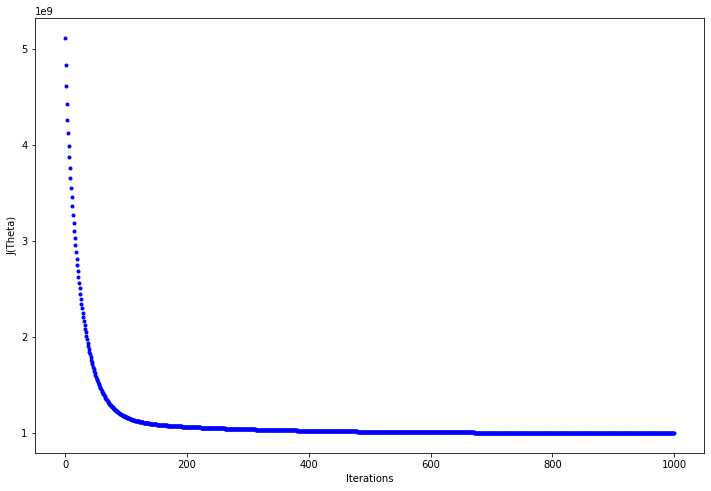

In [ ]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(12,8))
ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(1000),cost_history,'b.')

Discussion:

In general, the iterative errors should decrease over the course of the algorithm, reflecting an improvement in the fit of the model to the data. The searching path in the domain of the error function may be complex, with the algorithm potentially moving in a zig-zag pattern as it attempts to converge to the optimal values of the model coefficients. Visualizing the error function and the path taken by the algorithm can be useful in understanding the behavior of the algorithm and identifying potential issues such as local minima or slow convergence

to be honest, I am not sure whether these two outcome is comparable or not, but I think the features of each algorithms show great results, I think they are not very unlike.